# Exercise: Outlier removal using standard deviation and z score

In [1]:
import pandas as pd
import seaborn as sn

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [3]:
df= pd.read_csv("bhp.csv")
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [6]:
print(df.price_per_sqft.describe())

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

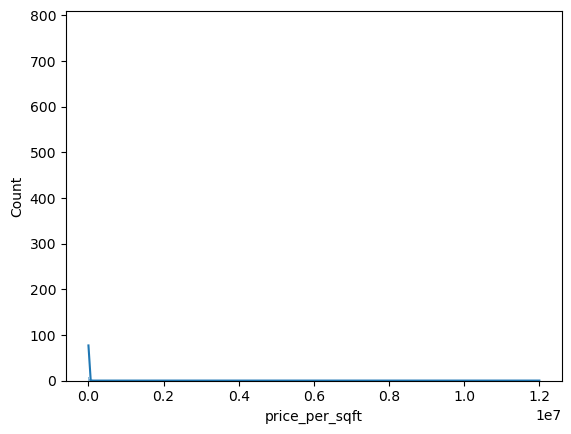

In [9]:
sn.histplot(df.price_per_sqft, kde=True)

In [10]:
#1.outlierspercentile
lowerlimit,upperlimit=df.price_per_sqft.quantile([0.001,0.999])
print(lowerlimit,upperlimit)

1366.184 50959.36200000098


In [21]:
outliers=df[(df.price_per_sqft>upperlimit)|(df.price_per_sqft<lowerlimit)]
print(outliers.head())
print(outliers.shape)

       location       size  total_sqft  bath  price  bhk  price_per_sqft
345       other  3 Bedroom        11.0   3.0   74.0    3          672727
665   Yelahanka      3 BHK     35000.0   3.0  130.0    3             371
798       other  4 Bedroom     10961.0   4.0   80.0    4             729
1005      other      1 BHK        15.0   1.0   30.0    1          200000
1106      other  5 Bedroom        24.0   2.0  150.0    5          625000
(28, 7)


In [22]:
nooutliers=df[(df.price_per_sqft<upperlimit)&(df.price_per_sqft>lowerlimit)]
print(nooutliers.shape)

(13172, 7)


In [24]:
print(df.shape[0]-nooutliers.shape[0])


28


In [26]:
#2.outliersusingstandardeviation(4)
df2=nooutliers
minlimit=df2.price_per_sqft.mean()-4*df2.price_per_sqft.std()
maxlimit=df2.price_per_sqft.mean()+4*df2.price_per_sqft.std()
print(minlimit,maxlimit)

-9900.429065502549 23227.73653589429


In [27]:
df2[(df2.price_per_sqft>maxlimit)|(df2.price_per_sqft<minlimit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [28]:
df3=df2[(df2.price_per_sqft<maxlimit)&(df2.price_per_sqft>minlimit)]

In [29]:
print(df3.shape)

(13047, 7)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

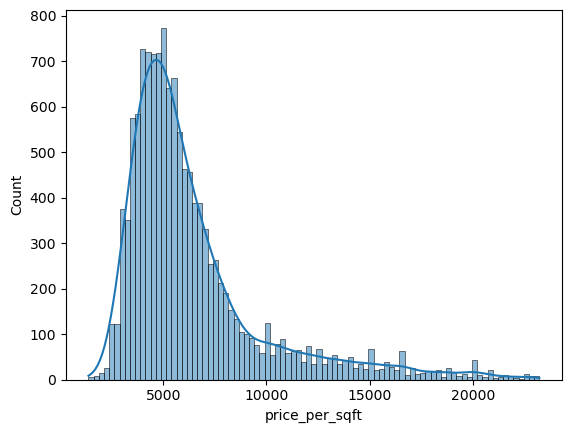

In [30]:
sn.histplot(df3.price_per_sqft, kde=True)

In [34]:
#3.outlierZ-Score

df2['Zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\keyco\AppData\Local\Temp\ipykernel_5828\774565148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
10982,Mysore Road,3 BHK,1248.52,3.0,115.00,3,9210,0.614908
5029,other,3 BHK,1388.00,3.0,69.99,3,5042,-0.391607
2016,Green Glen Layout,3 BHK,1670.00,3.0,120.00,3,7185,0.125898
9627,other,4 Bedroom,4800.00,4.0,420.00,4,8750,0.503824
1349,Chandapura,3 BHK,1065.00,2.0,33.00,3,3098,-0.861057
8975,other,3 Bedroom,3000.00,3.0,550.00,3,18333,2.817988
3992,Rajaji Nagar,4 BHK,3436.00,6.0,500.00,4,14551,1.904687
5987,Thanisandra,4 BHK,2259.00,5.0,135.00,4,5976,-0.166059
8896,Chamrajpet,2 BHK,730.00,1.0,52.00,2,7123,0.110926
5490,Kanakpura Road,1 BHK,525.00,1.0,30.00,1,5714,-0.229328


In [37]:
outlier_z=df2[(df2.Zscore<-4)|(df2.Zscore>4)]
outlier_z.shape

(125, 8)

In [39]:
df4=df2[(df2.Zscore>-4)&(df2.Zscore<4)]
print(df4.shape)

(13047, 8)
